In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Creation of Dataset for Classification

In [2]:
data = pd.read_csv('week2.csv')

In [3]:
data.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_perc_change,Trend
0,0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01,2017,May,0.000000,Slight Change
1,1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97,2017,May,1.905802,Positive
2,2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37,2017,May,0.061116,Slight Change
3,3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44,2017,May,-1.827340,Negative
4,4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,2017,May,-0.592881,Slight Negative


In [4]:
module4_data = pd.DataFrame()
module4_data = data['Close Price']
module4_data = pd.DataFrame(module4_data)
module4_data.head()

,Close Price
0,6823.90
1,6953.95
2,6958.20
3,6831.05
4,6790.55


In [5]:
module4_data.shape

(494, 1)

In [6]:
data_copy = data.copy()

In [7]:
data_copy

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_perc_change,Trend
0,0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.00,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01,2017,May,0.000000,Slight Change
1,1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.40,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97,2017,May,1.905802,Positive
2,2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.00,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37,2017,May,0.061116,Slight Change
3,3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.00,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44,2017,May,-1.827340,Negative
4,4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.30,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,2017,May,-0.592881,Slight Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,491,MARUTI,EQ,2019-05-07,6709.65,6744.9,6785.25,6680.00,6693.00,6702.00,6737.56,586684,3.952821e+09,69696,198757,33.88,2019,May,-0.114015,Slight Change
490,492,MARUTI,EQ,2019-05-08,6702.00,6679.0,6693.00,6616.00,6650.00,6650.15,6655.70,552749,3.678929e+09,59897,228920,41.41,2019,May,-0.773650,Slight Negative
491,493,MARUTI,EQ,2019-05-09,6650.15,6637.0,6678.00,6600.00,6609.85,6624.95,6646.86,570000,3.788710e+09,71334,257451,45.17,2019,May,-0.378939,Slight Change
492,494,MARUTI,EQ,2019-05-10,6624.95,6623.0,6664.90,6575.00,6630.00,6631.60,6622.41,608669,4.030855e+09,75423,247688,40.69,2019,May,0.100378,Slight Change


In [8]:
module4_data

,Close Price
0,6823.90
1,6953.95
2,6958.20
3,6831.05
4,6790.55
...,...
489,6702.00
490,6650.15
491,6624.95
492,6631.60


In [9]:
module4_data['Bollinger Upper'] =  (data_copy['Close Price'].rolling(14).mean()) + (data_copy['Close Price'].rolling(14).std()*2)
module4_data['Bollinger Middle'] = (data_copy['Close Price'].rolling(14).mean())
module4_data['Bollinger Lower'] =  (data_copy['Close Price'].rolling(14).mean()) - (data_copy['Close Price'].rolling(14).std()*2)

In [10]:
module4_data.head()

,Close Price,Bollinger Upper,Bollinger Middle,Bollinger Lower
0,6823.90,NaN,NaN,NaN
1,6953.95,NaN,NaN,NaN
2,6958.20,NaN,NaN,NaN
3,6831.05,NaN,NaN,NaN
4,6790.55,NaN,NaN,NaN


In [11]:
new_data_copy = module4_data.fillna(module4_data.mean())

In [12]:
module4_data.mean()

Close Price         8061.374595
Bollinger Upper     8435.076892
Bollinger Middle    8095.882447
Bollinger Lower     7756.688003
dtype: float64

In [13]:
new_data_copy['Bollinger Lower'].mean()

7756.688003034392

In [14]:
min(new_data_copy['Close Price'][:14])

6701.7

In [15]:
max(new_data_copy['Close Price'][:14])

7211.0

In [16]:
new_data_copy.head()

,Close Price,Bollinger Upper,Bollinger Middle,Bollinger Lower
0,6823.90,8435.076892,8095.882447,7756.688003
1,6953.95,8435.076892,8095.882447,7756.688003
2,6958.20,8435.076892,8095.882447,7756.688003
3,6831.05,8435.076892,8095.882447,7756.688003
4,6790.55,8435.076892,8095.882447,7756.688003


In [17]:
new_data_copy['Calls'] = 0
for i in new_data_copy.index:
    if(new_data_copy['Close Price'][i] < new_data_copy['Bollinger Lower'][i]):
        new_data_copy['Calls'][i] = 'Buy'
    elif(new_data_copy['Bollinger Lower'][i]<new_data_copy['Close Price'][i]<new_data_copy['Bollinger Middle'][i]):
        new_data_copy['Calls'][i] = 'Hold Buy / Liquidate Short'
    elif(new_data_copy['Bollinger Middle'][i]<new_data_copy['Close Price'][i]<new_data_copy['Bollinger Upper'][i]):
        new_data_copy['Calls'][i] = 'Hold Short / Liquidate Buy'
    elif(new_data_copy['Close Price'][i]>new_data_copy['Bollinger Upper'][i]):
        new_data_copy['Calls'][i] = 'Short'
    
    
    

/home/akansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/akansh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/akansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [18]:
new_data_copy.head()

,Close Price,Bollinger Upper,Bollinger Middle,Bollinger Lower,Calls
0,6823.90,8435.076892,8095.882447,7756.688003,Buy
1,6953.95,8435.076892,8095.882447,7756.688003,Buy
2,6958.20,8435.076892,8095.882447,7756.688003,Buy
3,6831.05,8435.076892,8095.882447,7756.688003,Buy
4,6790.55,8435.076892,8095.882447,7756.688003,Buy


In [19]:
new_data_copy.groupby('Calls').count()

,Close Price,Bollinger Upper,Bollinger Middle,Bollinger Lower
Calls,,,,
Buy,29,29,29,29
Hold Buy / Liquidate Short,225,225,225,225
Hold Short / Liquidate Buy,216,216,216,216
Short,24,24,24,24


# Loading Dataset for Classification

In [20]:
dataset = new_data_copy

dataset.head()


,Close Price,Bollinger Upper,Bollinger Middle,Bollinger Lower,Calls
0,6823.90,8435.076892,8095.882447,7756.688003,Buy
1,6953.95,8435.076892,8095.882447,7756.688003,Buy
2,6958.20,8435.076892,8095.882447,7756.688003,Buy
3,6831.05,8435.076892,8095.882447,7756.688003,Buy
4,6790.55,8435.076892,8095.882447,7756.688003,Buy


In [21]:
print(dataset.shape)

(494, 5)


### The classes for classification are not well balanced.

In [22]:
dataset.groupby('Calls').count()

,Close Price,Bollinger Upper,Bollinger Middle,Bollinger Lower
Calls,,,,
Buy,29,29,29,29
Hold Buy / Liquidate Short,225,225,225,225
Hold Short / Liquidate Buy,216,216,216,216
Short,24,24,24,24


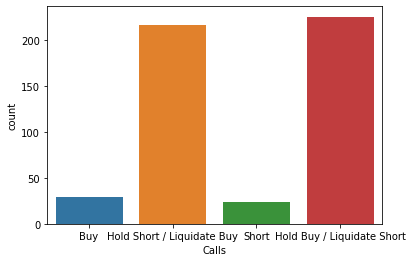

In [23]:
sns.countplot(dataset['Calls'])

# Train-Test Split

In [24]:
X = dataset.drop(['Calls'],axis=1)
Y = dataset['Calls']
print(X.shape,Y.shape)

(494, 4) (494,)


In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(370, 4) (124, 4) (370,) (124,)


# Pre-Processing

In [26]:
scaler = StandardScaler() 
le = LabelEncoder()

In [27]:
X_train_stand = scaler.fit_transform(X_train)
print(X_train_stand.shape)

(370, 4)


In [28]:
X_test_stand = scaler.transform(X_test)
print(X_test_stand.shape)

(124, 4)


In [29]:
Y_train_enc = le.fit_transform(Y_train)
print(Y_train_enc.shape)

(370,)


In [30]:
Y_test_enc = le.transform(Y_test)
print(Y_test_enc.shape)

(124,)


In [31]:
print(Y_train_enc)

[1 2 2 2 1 2 1 2 3 2 2 1 1 1 1 2 2 1 1 1 0 2 2 2 0 2 1 2 1 2 2 1 2 1 2 1 2
 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 0 2 2 2 2 1 2 1 2 2 1 1 1 2
 3 2 2 2 1 0 2 1 1 1 2 2 1 2 0 1 2 2 1 2 1 3 2 1 1 1 2 1 2 1 2 2 2 2 1 2 1
 2 1 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 2 1 1 1 2 2 1 2 2 1 1 2 1 2 2 1 1 2 1
 1 2 2 2 1 1 1 1 2 1 1 1 1 2 1 2 2 2 3 2 1 1 1 2 1 1 2 1 2 2 2 1 1 2 1 2 1
 2 1 2 2 2 1 0 2 2 1 1 1 1 1 1 2 3 2 2 2 2 0 1 1 1 3 2 1 2 2 2 2 2 0 1 2 1
 2 0 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 1 2 3 1 2 2 0 1 2 1 1 1 2 1 3 2 1 0 0 1
 1 1 1 1 2 1 2 1 2 2 2 3 1 2 1 2 1 1 2 2 1 2 2 2 2 2 3 2 2 3 2 2 1 2 2 2 1
 2 1 2 1 1 1 2 1 2 1 2 0 2 1 2 2 1 2 1 3 1 1 1 1 1 1 1 2 0 2 2 2 3 0 1 1 0
 2 2 1 2 1 3 1 2 1 1 1 1 1 2 1 2 2 1 1 2 2 2 1 2 2 1 1 2 0 1 1 1 2 1 2 2 1]


In [32]:
print(le.classes_)

['Buy' 'Hold Buy / Liquidate Short' 'Hold Short / Liquidate Buy' 'Short']


# Classification Models

## Logistic Regression

In [33]:
logis = LogisticRegression(class_weight={0:1,1:1,2:1,3:1},C=10000,random_state=0)

In [34]:
logis.fit(X_train_stand,Y_train_enc)


/home/akansh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akansh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=10000, class_weight={0: 1, 1: 1, 2: 1, 3: 1}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Accuracy Obtained

In [35]:
Y_train_pred = logis.predict(X_train_stand)
Y_test_pred = logis.predict(X_test_stand)
train_accuracy = accuracy_score(Y_train_pred,Y_train_enc)
test_accuracy = accuracy_score(Y_test_pred,Y_test_enc)
print(f'The Training Accuracy is: {np.round(train_accuracy * 100,4)}%\nThe Testing Accuracy is: {np.round(test_accuracy*100,4)}%')

The Training Accuracy is: 94.8649%
The Testing Accuracy is: 94.3548%


### Classifcation Report & Confusion Matrix

In [36]:
print(classification_report(Y_test_pred,Y_test_enc))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.93      0.96        59
           2       0.98      0.94      0.96        49
           3       0.70      1.00      0.82         7

    accuracy                           0.94       124
   macro avg       0.86      0.97      0.90       124
weighted avg       0.96      0.94      0.95       124



In [37]:
Y_train_pred

array([1, 2, 2, 2, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 3, 2, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 3, 2, 2, 2, 2, 0, 1, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 0, 1,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 3,
       1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 3, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1,

# Support Vector Machine

In [38]:
svm = SVC(C=10,class_weight={0:10,1:1,2:1,3:10},kernel='rbf',random_state=0)

In [39]:
svm.fit(X_train_stand,Y_train_enc)


SVC(C=10, cache_size=200, class_weight={0: 10, 1: 1, 2: 1, 3: 10}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
Y_train_pred = svm.predict(X_train_stand)
Y_test_pred = svm.predict(X_test_stand)
train_accuracy = accuracy_score(Y_train_pred,Y_train_enc)
test_accuracy = accuracy_score(Y_test_pred,Y_test_enc)
print(f'The Training Accuracy is: {np.round(train_accuracy * 100,4)}%\nThe Testing Accuracy is: {np.round(test_accuracy*100,4)}%')

The Training Accuracy is: 92.1622%
The Testing Accuracy is: 92.7419%


In [41]:
print(classification_report(Y_test_pred,Y_test_enc))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.95      0.91      0.93        57
           2       0.91      1.00      0.96        43
           3       1.00      0.91      0.95        11

    accuracy                           0.93       124
   macro avg       0.92      0.90      0.91       124
weighted avg       0.93      0.93      0.93       124



In [42]:
print(classification_report(Y_train_pred,Y_train_enc))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        23
           1       0.96      0.92      0.94       178
           2       0.86      1.00      0.93       146
           3       1.00      0.61      0.76        23

    accuracy                           0.92       370
   macro avg       0.96      0.82      0.87       370
weighted avg       0.93      0.92      0.92       370



# KNN

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(X_train_stand,Y_train_enc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
Y_train_pred = knn.predict(X_train_stand)
Y_test_pred = knn.predict(X_test_stand)
train_accuracy = accuracy_score(Y_train_pred,Y_train_enc)
test_accuracy = accuracy_score(Y_test_pred,Y_test_enc)
print(f'The Training Accuracy is: {np.round(train_accuracy * 100,4)}%\nThe Testing Accuracy is: {np.round(test_accuracy*100,4)}%')

The Training Accuracy is: 88.9189%
The Testing Accuracy is: 80.6452%


In [46]:
print(classification_report(Y_test_pred,Y_test_enc))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.95      0.83      0.88        63
           2       0.89      0.76      0.82        55
           3       0.00      0.00      0.00         0

    accuracy                           0.81       124
   macro avg       0.58      0.65      0.59       124
weighted avg       0.90      0.81      0.85       124



/home/akansh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Naive-Bayes

In [47]:
nb = GaussianNB()

In [48]:
nb.fit(X_train_stand,Y_train_enc)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
Y_train_pred = nb.predict(X_train_stand)
Y_test_pred = nb.predict(X_test_stand)
train_accuracy = accuracy_score(Y_train_pred,Y_train_enc)
test_accuracy = accuracy_score(Y_test_pred,Y_test_enc)
print(f'The Training Accuracy is: {np.round(train_accuracy * 100,4)}%\nThe Testing Accuracy is: {np.round(test_accuracy*100,4)}%')

The Training Accuracy is: 51.3514%
The Testing Accuracy is: 38.7097%


In [50]:
print(classification_report(Y_test_pred,Y_test_enc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.40      0.42      0.41        53
           2       0.55      0.37      0.44        71
           3       0.00      0.00      0.00         0

    accuracy                           0.39       124
   macro avg       0.24      0.20      0.21       124
weighted avg       0.49      0.39      0.43       124



/home/akansh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Decision Trees

In [51]:
dt = DecisionTreeClassifier()


In [52]:
dt.fit(X_train_stand,Y_train_enc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
Y_train_pred = dt.predict(X_train_stand)
Y_test_pred = dt.predict(X_test_stand)
train_accuracy = accuracy_score(Y_train_pred,Y_train_enc)
test_accuracy = accuracy_score(Y_test_pred,Y_test_enc)
print(f'The Training Accuracy is: {np.round(train_accuracy * 100,4)}%\nThe Testing Accuracy is: {np.round(test_accuracy*100,4)}%')

The Training Accuracy is: 100.0%
The Testing Accuracy is: 71.7742%


In [54]:
print(classification_report(Y_test_pred,Y_test_enc))

              precision    recall  f1-score   support

           0       0.42      0.38      0.40        13
           1       0.71      0.81      0.76        48
           2       0.94      0.71      0.81        62
           3       0.10      1.00      0.18         1

    accuracy                           0.72       124
   macro avg       0.54      0.73      0.54       124
weighted avg       0.79      0.72      0.74       124



# Random Forest

In [55]:
rf = RandomForestClassifier()


In [56]:
rf.fit(X_train_stand,Y_train_enc)

/home/akansh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
Y_train_pred = rf.predict(X_train_stand)
Y_test_pred = rf.predict(X_test_stand)
train_accuracy = accuracy_score(Y_train_pred,Y_train_enc)
test_accuracy = accuracy_score(Y_test_pred,Y_test_enc)
print(f'The Training Accuracy is: {np.round(train_accuracy * 100,4)}%\nThe Testing Accuracy is: {np.round(test_accuracy*100,4)}%')

The Training Accuracy is: 98.3784%
The Testing Accuracy is: 83.0645%


In [58]:
print(classification_report(Y_test_pred,Y_test_enc))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       0.95      0.85      0.90        61
           2       0.91      0.78      0.84        55
           3       0.10      1.00      0.18         1

    accuracy                           0.83       124
   macro avg       0.64      0.91      0.66       124
weighted avg       0.90      0.83      0.86       124



# Importing another stock & using the classification model SVM

In [59]:
ashoka_stock_data = pd.read_csv('ASHOKA.csv')
ashoka_stock_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ASHOKA,EQ,15-May-2017,210.35,211.0,217.5,206.15,216.30,216.05,212.63,159997,34020520.45,3506,88509,55.32
1,ASHOKA,EQ,16-May-2017,216.05,212.3,216.0,211.00,214.00,214.90,213.24,213214,45466299.10,2860,151941,71.26
2,ASHOKA,EQ,17-May-2017,214.90,214.3,218.7,212.10,216.55,217.00,215.97,383131,82743402.10,3297,261939,68.37
3,ASHOKA,EQ,18-May-2017,217.00,216.0,216.6,208.00,210.00,209.65,211.74,78709,16665707.55,1372,35458,45.05
4,ASHOKA,EQ,19-May-2017,209.65,212.1,213.9,205.05,206.05,206.25,209.95,398725,83713500.05,2060,301747,75.68


In [60]:
print(ashoka_stock_data.shape)

(494, 15)


In [61]:
data_class = pd.DataFrame(ashoka_stock_data['Close Price'])
data_class.head()

,Close Price
0,216.05
1,214.90
2,217.00
3,209.65
4,206.25


In [62]:
print(data_class.shape)

(494, 1)


In [63]:
data_class['Bollinger Upper'] =  (ashoka_stock_data['Close Price'].rolling(14).mean()) + (ashoka_stock_data['Close Price'].rolling(14).std()*2)
data_class['Bollinger Middle'] = (ashoka_stock_data['Close Price'].rolling(14).mean())
data_class['Bollinger Lower'] =  (ashoka_stock_data['Close Price'].rolling(14).mean()) - (ashoka_stock_data['Close Price'].rolling(14).std()*2)

In [64]:
data_class.head()

,Close Price,Bollinger Upper,Bollinger Middle,Bollinger Lower
0,216.05,NaN,NaN,NaN
1,214.90,NaN,NaN,NaN
2,217.00,NaN,NaN,NaN
3,209.65,NaN,NaN,NaN
4,206.25,NaN,NaN,NaN


In [65]:
data_class = data_class.fillna(data_class.mean())
data_class.head()

,Close Price,Bollinger Upper,Bollinger Middle,Bollinger Lower
0,216.05,196.92636,183.128557,169.330753
1,214.90,196.92636,183.128557,169.330753
2,217.00,196.92636,183.128557,169.330753
3,209.65,196.92636,183.128557,169.330753
4,206.25,196.92636,183.128557,169.330753


In [66]:
print(data_class.shape)

(494, 4)


In [67]:
data_class_stand = scaler.fit_transform(data_class)

In [68]:
Y_pred = svm.predict(data_class_stand)

In [69]:
Y_pred = le.inverse_transform(Y_pred)

In [70]:
Y_pred

array(['Short', 'Short', 'Short', 'Short', 'Short', 'Short',
       'Hold Short / Liquidate Buy', 'Hold Short / Liquidate Buy',
       'Short', 'Short', 'Short', 'Hold Short / Liquidate Buy',
       'Hold Short / Liquidate Buy', 'Hold Buy / Liquidate Short',
       'Hold Buy / Liquidate Short', 'Hold Buy / Liquidate Short',
       'Hold Buy / Liquidate Short', 'Hold Buy / Liquidate Short',
       'Hold Buy / Liquidate Short', 'Hold Buy / Liquidate Short',
       'Hold Buy / Liquidate Short', 'Hold Buy / Liquidate Short',
       'Hold Buy / Liquidate Short', 'Hold Buy / Liquidate Short',
       'Hold Short / Liquidate Buy', 'Hold Short / Liquidate Buy',
       'Hold Short / Liquidate Buy', 'Hold Short / Liquidate Buy',
       'Hold Buy / Liquidate Short', 'Hold Buy / Liquidate Short',
       'Hold Buy / Liquidate Short', 'Hold Buy / Liquidate Short',
       'Hold Buy / Liquidate Short', 'Hold Buy / Liquidate Short',
       'Hold Buy / Liquidate Short', 'Hold Buy / Liquidate Short',
    

In [71]:
data_class['Calls_Pred'] = Y_pred 

In [72]:
data_class.head()

,Close Price,Bollinger Upper,Bollinger Middle,Bollinger Lower,Calls_Pred
0,216.05,196.92636,183.128557,169.330753,Short
1,214.90,196.92636,183.128557,169.330753,Short
2,217.00,196.92636,183.128557,169.330753,Short
3,209.65,196.92636,183.128557,169.330753,Short
4,206.25,196.92636,183.128557,169.330753,Short


In [73]:
data_class.tail(50)

,Close Price,Bollinger Upper,Bollinger Middle,Bollinger Lower,Calls_Pred
444,119.05,123.325383,114.417857,105.510332,Hold Short / Liquidate Buy
445,116.40,123.242736,114.378571,105.514407,Hold Short / Liquidate Buy
446,114.45,122.897612,114.182143,105.466674,Hold Short / Liquidate Buy
447,118.50,123.477807,114.460714,105.443621,Hold Short / Liquidate Buy
448,121.20,124.697470,115.075000,105.452530,Hold Short / Liquidate Buy
449,129.55,128.422747,116.392857,104.362968,Hold Short / Liquidate Buy
450,137.55,134.337836,118.303571,102.269307,Hold Short / Liquidate Buy
451,134.45,137.613961,119.921429,102.228896,Hold Short / Liquidate Buy
452,133.95,140.048905,121.471429,102.893952,Hold Short / Liquidate Buy
453,137.35,142.520818,123.439286,104.357753,Hold Short / Liquidate Buy


# 4.2

In [74]:
data = pd.read_csv('week2.csv')
data.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_perc_change,Trend
0,0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01,2017,May,0.000000,Slight Change
1,1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97,2017,May,1.905802,Positive
2,2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37,2017,May,0.061116,Slight Change
3,3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44,2017,May,-1.827340,Negative
4,4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,2017,May,-0.592881,Slight Negative


In [75]:
data_copy = data.copy()

In [76]:
data_copy['% change b/w open and close per day'] = 1.0
data_copy['% change b/w high and low per day'] = 1.0


In [77]:
for i in data_copy.index:
    diff = data_copy['Close Price'][i] - data_copy['Open Price'][i]
    data_copy['% change b/w open and close per day'][i] = (diff/data_copy['Close Price'][i])*100
    diff = data_copy['High Price'][i] - data_copy['Low Price'][i]
    data_copy['% change b/w high and low per day'][i] = (diff/data_copy['High Price'][i])*100

/home/akansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/akansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [78]:
data_copy.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_perc_change,Trend,% change b/w open and close per day,% change b/w high and low per day
0,0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,...,2.286158e+09,31377,154743,46.01,2017,May,0.000000,Slight Change,0.945207,1.544794
1,1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,...,4.884174e+09,49047,360641,50.97,2017,May,1.905802,Positive,1.494834,2.114639
2,2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,...,3.087758e+09,65280,260033,58.37,2017,May,0.061116,Slight Change,0.117847,1.334718
3,3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,...,2.794684e+09,37063,188907,46.44,2017,May,-1.827340,Negative,-1.277256,1.922136
4,4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,...,3.750475e+09,64293,234662,42.49,2017,May,-0.592881,Slight Negative,-0.946168,2.935204


In [79]:
data_copy['5 day rolling mean % of Close Price'] = data_copy['Day_perc_change'].rolling(5).mean()
data_copy['5 day rolling std % of Close Price'] = data_copy['Day_perc_change'].rolling(5).std()

In [80]:
data_copy.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_perc_change,Trend,% change b/w open and close per day,% change b/w high and low per day,5 day rolling mean % of Close Price,5 day rolling std % of Close Price
0,0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,...,154743,46.01,2017,May,0.000000,Slight Change,0.945207,1.544794,NaN,NaN
1,1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,...,360641,50.97,2017,May,1.905802,Positive,1.494834,2.114639,NaN,NaN
2,2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,...,260033,58.37,2017,May,0.061116,Slight Change,0.117847,1.334718,NaN,NaN
3,3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,...,188907,46.44,2017,May,-1.827340,Negative,-1.277256,1.922136,NaN,NaN
4,4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,...,234662,42.49,2017,May,-0.592881,Slight Negative,-0.946168,2.935204,-0.090661,1.349574


In [81]:
data_copy = data_copy.fillna(0)

In [82]:
data_copy.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_perc_change,Trend,% change b/w open and close per day,% change b/w high and low per day,5 day rolling mean % of Close Price,5 day rolling std % of Close Price
0,0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,...,154743,46.01,2017,May,0.000000,Slight Change,0.945207,1.544794,0.000000,0.000000
1,1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,...,360641,50.97,2017,May,1.905802,Positive,1.494834,2.114639,0.000000,0.000000
2,2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,...,260033,58.37,2017,May,0.061116,Slight Change,0.117847,1.334718,0.000000,0.000000
3,3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,...,188907,46.44,2017,May,-1.827340,Negative,-1.277256,1.922136,0.000000,0.000000
4,4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,...,234662,42.49,2017,May,-0.592881,Slight Negative,-0.946168,2.935204,-0.090661,1.349574


In [83]:
data_separated = data_copy.iloc[:,-4:]

In [84]:
data_separated['Close Price'] = data_copy['Close Price']

In [85]:
data_separated.head()

,% change b/w open and close per day,% change b/w high and low per day,5 day rolling mean % of Close Price,5 day rolling std % of Close Price,Close Price
0,0.945207,1.544794,0.000000,0.000000,6823.90
1,1.494834,2.114639,0.000000,0.000000,6953.95
2,0.117847,1.334718,0.000000,0.000000,6958.20
3,-1.277256,1.922136,0.000000,0.000000,6831.05
4,-0.946168,2.935204,-0.090661,1.349574,6790.55


In [86]:
data_separated['Action'] = 1
for i in data_separated.index[:-1]:
    if(data_separated['Close Price'][i+1] >= data_separated['Close Price'][i]):
        data_separated['Action'][i] = 1
    elif(data_separated['Close Price'][i+1] <= data_separated['Close Price'][i]):
        data_separated['Action'][i] = -1


    
    

/home/akansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/akansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
data_separated.head()

,% change b/w open and close per day,% change b/w high and low per day,5 day rolling mean % of Close Price,5 day rolling std % of Close Price,Close Price,Action
0,0.945207,1.544794,0.000000,0.000000,6823.90,1
1,1.494834,2.114639,0.000000,0.000000,6953.95,1
2,0.117847,1.334718,0.000000,0.000000,6958.20,-1
3,-1.277256,1.922136,0.000000,0.000000,6831.05,-1
4,-0.946168,2.935204,-0.090661,1.349574,6790.55,-1


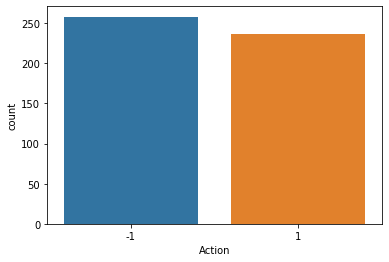

In [88]:
sns.countplot(data_separated['Action'])

In [89]:
data_separated.groupby('Action').count()

,% change b/w open and close per day,% change b/w high and low per day,5 day rolling mean % of Close Price,5 day rolling std % of Close Price,Close Price
Action,,,,,
-1,258,258,258,258,258
1,236,236,236,236,236


In [90]:
data_separated.iloc[-2]

% change b/w open and close per day       0.129682
% change b/w high and low per day         1.348857
5 day rolling mean % of Close Price      -0.234288
5 day rolling std % of Close Price        0.350277
Close Price                            6631.600000
Action                                   -1.000000
Name: 492, dtype: float64

# Classification Model for this

In [91]:
X = data_separated.drop(['Action','Close Price'],axis=1)
Y = data_separated['Action']
print(X.shape,Y.shape)

(494, 4) (494,)


In [92]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(370, 4) (124, 4) (370,) (124,)


In [93]:
X_train_stand = scaler.fit_transform(X_train)
print(X_train_stand.shape)
X_test_stand = scaler.transform(X_test)
print(X_test_stand.shape)

(370, 4)
(124, 4)


In [94]:
rf = RandomForestClassifier()
rf.fit(X_train_stand,Y_train)

/home/akansh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
Y_train_pred = rf.predict(X_train_stand)
Y_test_pred = rf.predict(X_test_stand)
train_accuracy = accuracy_score(Y_train_pred,Y_train)
test_accuracy = accuracy_score(Y_test_pred,Y_test)
print(f'The Training Accuracy is: {np.round(train_accuracy * 100,4)}%\nThe Testing Accuracy is: {np.round(test_accuracy*100,4)}%')

The Training Accuracy is: 96.4865%
The Testing Accuracy is: 48.3871%


In [96]:
print(classification_report(Y_test_pred,Y_test))

              precision    recall  f1-score   support

          -1       0.58      0.51      0.54        75
           1       0.37      0.45      0.41        49

    accuracy                           0.48       124
   macro avg       0.48      0.48      0.48       124
weighted avg       0.50      0.48      0.49       124



# Net Cumulative Returns

In [97]:
cum_returns = []
sum_i = 0
for i,j in enumerate(data_copy['Day_perc_change']):
    sum_i += j
    cum_returns.append(sum_i)

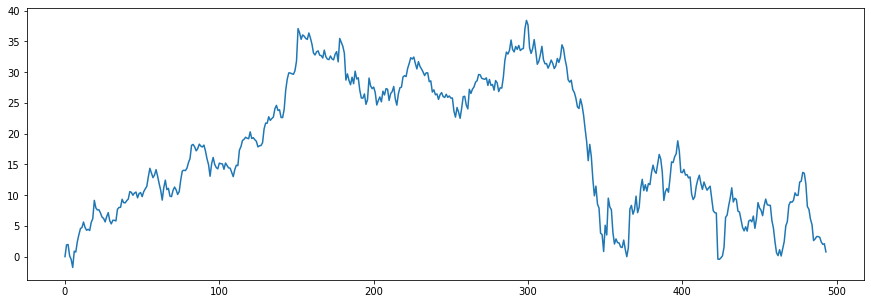

In [98]:
plt.figure(figsize=(15,5))
plt.plot(cum_returns)
plt.show()

### Another Way for calculating Cumulative Returns using the formula: 
## $ \frac{Current  Price  of  Security  -  Original  Price}{Original Price}$ 

In [123]:
cum_returns = []
for i in data_copy.index[1:]:
    cum_returns.append(((data_copy['Close Price'][i] - data_copy['Close Price'][0])/data_copy['Close Price'][0]) * 100 )
    

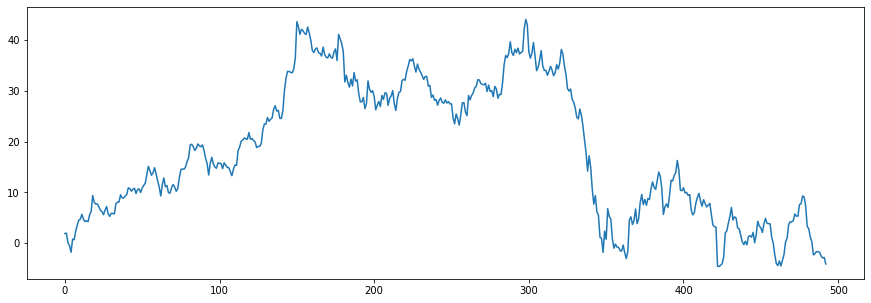

In [124]:
plt.figure(figsize=(15,5))
plt.plot(cum_returns)
plt.show()